<a id="top"></a>
<h1 style="font-size:50px; color:#3A71AE"><center>Analyzing and Visualization</center></h1>

<h1 style="font-size:35px; color:#3A71AE">Table of Content:</h1>

1. [**Introduction**](#id_1)
2. [**Notebook Structure**](#id_2)
3. [**Reading the Data**](#id_3)
4. [**Exploring and Analyzing**](#id_4)
5. [**Communication and Visualization**](#id_5)
6. [**Reporting**](#id_6)

<a id="id_1"></a>
<h1 style="font-size:30px; color:#3A71AE">Introduction</h1>

In this notebook, we will start to analyze and explore the data we have cleaned in the previous notebook [**Data Wrangling**](0_data_wrangling.ipynb), then visualize the `interesting properties`, `trends`, and `relationships` that we discovered through aesthetic and polished visuals using the different **Python** visualization libraries.

[Back to Top](#top)

<a id="id_2"></a>
<h1 style="font-size:30px; color:#3A71AE">Notebook Structure</h1>

**This Notebook will be structured as follows:**<br>
- We will start with analyzing and exploring the data.
- Then Visualizing the insights and answers we have found.
- Finally, we will report our efforts.

[Back to Top](#top)

<a id="id_3"></a>
<h1 style="font-size:30px; color:#3A71AE">Reading the Data</h1>

So, let's gather our data from `country_clean`, `corona_clean`, `economy_clean`, `pop_clean`, `healthcare_clean` and `social_clean` CSV files first.

[Back to Top](#top)

In [1]:
# importing necessary libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

# Setting DPI and default figure size
plt.rcParams['figure.dpi']= 100
plt.rcParams["figure.figsize"] = [10, 4]

# df names
dfs = ['country', 'corona', 'economy', 'pop', 'healthcare', 'social']

# Create category to set 'date' data type to datetime
def set_datetime_type(df):
    df['date'] = pd.to_datetime(df['date'])
    
# Creating two functions to replace datatypes for continent and test_units with new ones
def set_continent_dtype(df):
    continents_unique = pd.Series(df['continent'].unique()).dropna()
    # Creating new categorical type
    continent_category = pd.CategoricalDtype(continents_unique)
    # Replaceing old data type with new ones
    df['continent'] = df['continent'].astype(continent_category)

def set_test_units_dtype(df):
    test_units_unique = pd.Series(df['test_units'].unique()).dropna()
    unit_types_category = pd.CategoricalDtype(test_units_unique)
    df['test_units'] = df['test_units'].astype(unit_types_category)
    
# Reading each df from 'data' directory using the string name by using 'vars()' function.
for df_ in dfs:
    df_name = df_.split('_')[0]
    vars()[df_name] = pd.read_csv('data/{}_clean.csv'.format(df_), low_memory = False)
    # Resetting the pre-changed variables data types
    if df_ == 'country':
        set_continent_dtype(country)
    elif df_ == 'corona':
        set_datetime_type(corona)
        set_test_units_dtype(corona)

<a id="id_4"></a>
<h1 style="font-size:30px; color:#3A71AE">Exploring and Analyzing</h1>

**Now, let's discuss the following topics and questions:**
1. [**What Are The Total Cases For Each Continent?**](#id_4_1)
2. [**What are The Top 10 Infected Countries?**](#id_4_2)
3. [**Does Smoking Habit Affect Corona Infection Rates and Corona Death Rates?**](#id_4_3)
4. [**Does Government Stringency Policies Reduced Infection Rates?**](#id_4_4)
5. [**What's the Monthly State for Corona Cases and Deaths?**](#id_4_5)
6. [**What's The World Situation Now?**](#id_4_6)
    
[Back to Top](#top)

<a id="id_4_1"></a>
## [**What Are The Total Cases For Each Continent?**](#id_4_1)
Let's find out which continent has the heightest infection rates and which has the lowest.

[Explore](#id_4_1_1) - [Conclusions](#id_4_1_2)

[Back to Explore and Analyze](#id_4)

<a id="id_4_1_1"></a>
#### [Explore](#id_4_1_1)
[Back](#id_4_1)

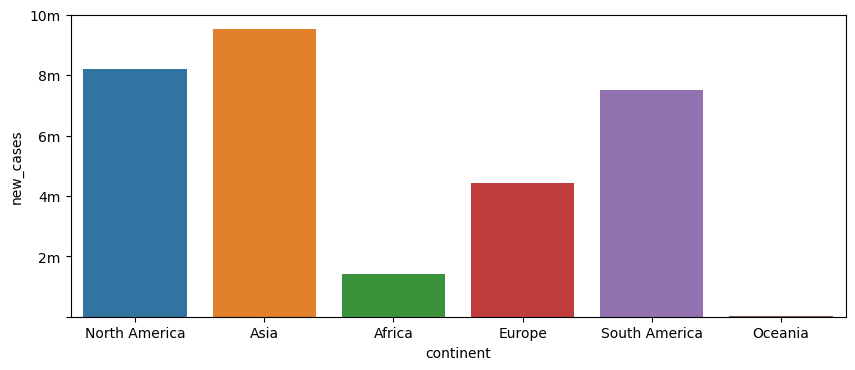

In [2]:
# Getting total cases for each continent
cont_cases = corona.merge(country, on = 'country_code').groupby('continent')['new_cases'].sum()

sb.barplot(x = cont_cases.index, y = cont_cases) # Create barplot

# Customizing y ticks and albels
yticks = [0, 2e6, 4e6, 6e6, 8e6, 10e6]
ylabels = ['', '2m', '4m', '6m', '8m', '10m']
plt.yticks(ticks = yticks, labels = ylabels);

> It looks like, `Asia` continent has the highest infection rate so far followed by `South America`, right?!!
>
> But we **`can't accept`** this result because we didn't account for population for each continent.
>
> Let's modify the previous plot to add the `total cases` to `total population` ratio for each continent using `feature engineering` concept.

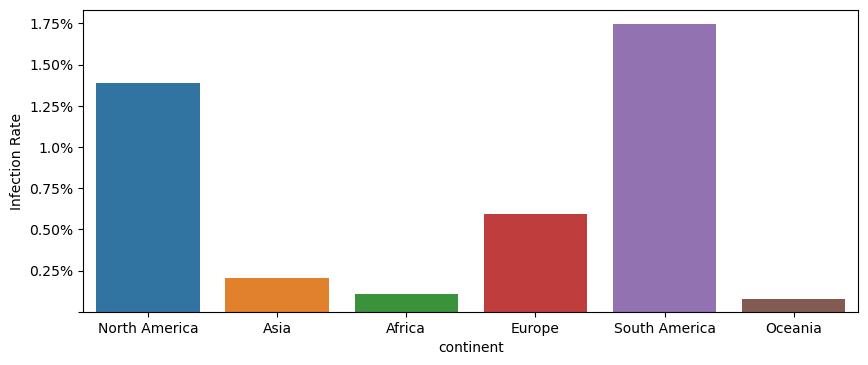

In [3]:
# Getting total cases to the toal population for each continent 
cont_cases = corona.merge(country, on = 'country_code').groupby('continent')['new_cases'].sum()
country_pop = country.merge(pop, on = 'country_code').groupby('continent')['population'].sum()
pop_cases_ratio = (cont_cases / country_pop) * 100 # infected ratio

sb.barplot(x = pop_cases_ratio.index, y = pop_cases_ratio)# Create barplot

# Customizing y ticks and albels
yticks = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75]
yticklabels = ['', '0.25%', '0.50%', '0.75%', '1.0%', '1.25%', '1.50%', '1.75%']
plt.yticks(ticks = yticks, labels = yticklabels)
plt.ylabel("Infection Rate");

> Now, we can see that `South America` followed by `North America` are the highest infection rates between continents, while `Asia` continent is on the 4th rank after `Europe`.
>
> The huge change in `Asia` continent rank between the first and second plot is due to the number of population for `Aisa`. 
>
> Let's find the ratio between `Asia` total population and the `world` total population.

In [4]:
# Computing Asia total population to the world
cont_pop = pop.merge(country, on = 'country_code').groupby('continent')['population'].sum().sort_values(ascending = False)

(cont_pop['Asia'] / sum(cont_pop)) * 100

59.38901652982393

<a id="id_4_1_2"></a>
#### [Conclusions](#id_4_1_2)
We `can't accept` the `first plot` that depends on numbers because one of the elements (`Asia`) has almost `60%` of the total population.

While, we can `accept` the `second plot` because it depends on **ratios** not numbers.

[Back](#id_4_1)

<a id="id_4_2"></a>
## [What are The Top 10 Infected Countries?](#id_4_2)
Let's find out the top 5 infected countries according to infection rates.

[Explore](#id_4_2_1) - [Conclusions](#id_4_2_2) - [Communicate](#id_4_2_3)

[Back to Explore and Analyze](#id_4)

<a id="id_4_2_1"></a>
### [Explore](#id_4_2_1)

In [5]:
# Creating function that subsetting a df with a specified variables then getting max variables for one of them
# For computing total cases each continent, country, etc.
def get_max_cate(df, lis, max_v):
    return df[lis].sort_values('country_code').groupby('country_code')[max_v].max()

# Total cases per country
corona_country = get_max_cate(corona, ['country_code', 'total_cases'], 
                              ['total_cases']).reset_index()

# Subsetting the want variables
pop_country = pop[['country_code', 'population']]
country_names = country[['country_code','country_name']]

# Merging the different variables from different tables
country_names_corona = corona_country.merge(pop_country, on = 'country_code').merge(country_names, on = 'country_code')

# Calculating infected ratio
country_names_corona['infected_ratio'] = (country_names_corona['total_cases'] / country_names_corona['population']) * 100

# Getting the top infected country
top_5_infected_countries = country_names_corona.loc[country_names_corona['infected_ratio'].nlargest(5).index]
top_5_infected_countries = top_5_infected_countries.reset_index(drop = True)
top_5_infected_countries

,country_code,total_cases,population,country_name,infected_ratio
0,QAT,123376.0,2881060.0,Qatar,4.282313
1,BHR,64499.0,1701583.0,Bahrain,3.790529
2,ABW,3551.0,106766.0,Aruba,3.325965
3,PAN,106203.0,4314768.0,Panama,2.461384
4,CHL,446274.0,19116209.0,Chile,2.334532


> **Note:** **Infection ratio** (`total_cases` / `population`) can be high if the **test ratio** (`total_tests` / `population`) is high, thus if we accepted these numbers it could be missleading, While it due to the high number of tests that country has done to the total number of it's population.
> 
> So, let's add the **test ratio** to **infection ratio** in our comparison.

In [6]:
# Total cases per country
country_tests = corona[['country_code', 'total_tests']].groupby('country_code').max().dropna().reset_index()

# Merging the different variables from different tables
country_names_tests = country_names_corona.merge(country_tests, on = 'country_code')

# Calculating test ratio
country_names_tests['test_ratio'] = (country_names_tests['total_tests'] / country_names_tests['population']) * 100

# Getting the top 10 infected country after accounting for test ratio
top_infected_countries = country_names_tests.loc[country_names_tests['infected_ratio'].nlargest(100).index]
top_infected_countries = top_infected_countries.query('test_ratio < 5').reset_index(drop = True)[:10]

top_infected_countries

,country_code,total_cases,population,country_name,infected_ratio,total_tests,test_ratio
0,PER,768895.0,32971846.0,Peru,2.331974,630521.0,1.912301
1,BRA,4544629.0,212559409.0,Brazil,2.138051,5900000.0,2.775695
2,ARG,622921.0,45195777.0,Argentina,1.378273,1469532.0,3.251481
3,CRI,63712.0,5094114.0,Costa Rica,1.250698,170995.0,3.356717
4,BOL,130676.0,11673029.0,Bolivia,1.119470,277645.0,2.378517
5,DOM,108289.0,10847904.0,Dominican Republic,0.998248,408014.0,3.761224
6,IRQ,319035.0,40222503.0,Iraq,0.793175,1998295.0,4.968102
7,ECU,126419.0,17643060.0,Ecuador,0.716537,323679.0,1.834597
8,MEX,697663.0,128932753.0,Mexico,0.541106,1485940.0,1.152492
9,IRN,422140.0,83992953.0,Iran,0.502590,3719210.0,4.428002


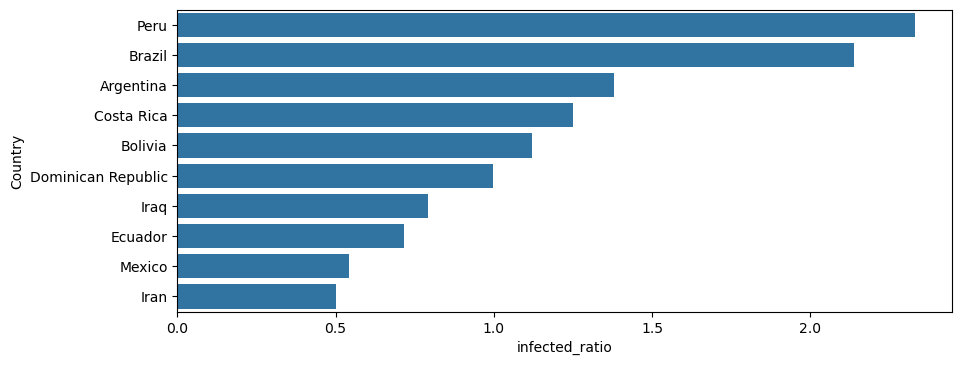

In [7]:
# Setting base color 
color_base = sb.color_palette()[0]
sb.barplot(data = top_infected_countries, y = 'country_name', x = 'infected_ratio', color = color_base) # barplot
plt.ylabel('Country');

<a id="id_4_2_2"></a>
### [Conclusions](#id_4_2_2)
By taking the `test ratio` in account, we can accurately compute the highly infected countries with **Covid-19**.

<a id="id_4_3"></a>
## [Does Smoking Habit Affect Corona Infection Rates and Corona Death Rates?](#id_4_3)
In the COVID-19 pandemic, questions have been asked about clinical outcomes for smokers, and whether they are equally susceptible to infection, and if nicotine has any biological effect on the SAR-CoV-2 virus.

**Reference:** This article from [**WHO**](https://www.who.int/news-room/commentaries/detail/smoking-and-covid-19).

[Explore](#id_4_3_1) - [Conclusions](#id_4_3_2)

[Back to Explore and Analyze](#id_4)

<a id="id_4_3_1"></a>
### [Explore](#id_4_3_1)

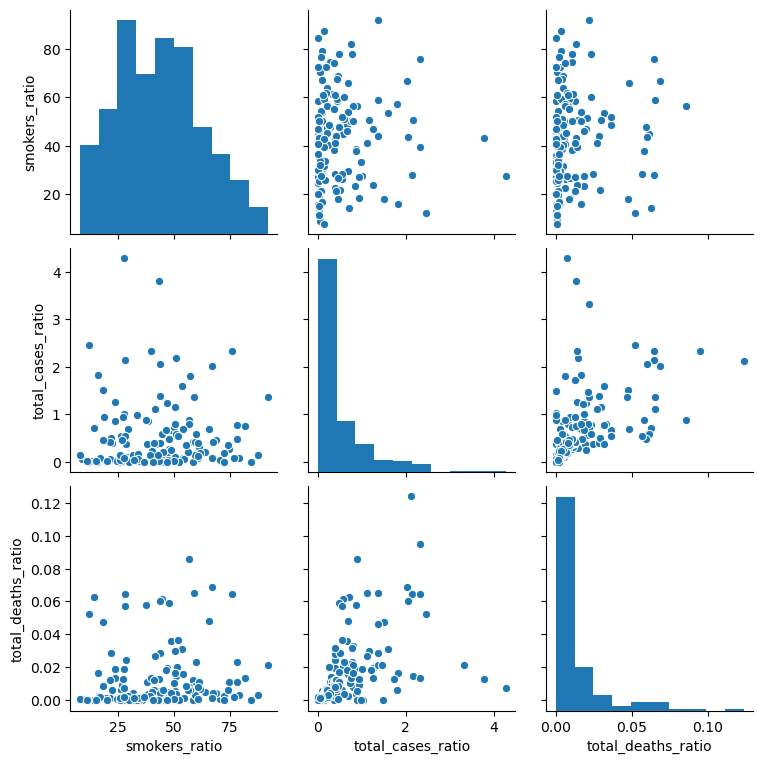

In [8]:
# Preparing the data
corona_cn = corona.merge(country, on = 'country_code')

# Total cases and deaths per country
corona_cn_sum = corona_cn.groupby('country_code').sum().reset_index()[['country_code',
                                                                       'new_cases', 
                                                                       'new_deaths',]]
# Modifying columns names
corona_cn_sum.columns = pd.Series(corona_cn_sum.columns.values).replace({'new_cases': 'total_cases',
                                                                         'new_deaths': 'total_deaths'})
# adding smokers and population stats
corona_cn_sm = corona_cn_sum.merge(healthcare[['country_code',
                                               'female_smokers',
                                               'male_smokers']],
                                   on = 'country_code').merge(pop[['country_code',
                                                                   'population']],
                                                              on = 'country_code')

# total smokers ratio per population (males + females ratios)
corona_cn_sm['smokers_ratio'] = corona_cn_sm['female_smokers'] + corona_cn_sm['male_smokers']
corona_cn_sm['total_cases_ratio'] =  (corona_cn_sm['total_cases'] / corona_cn_sm['population']) * 100 # infection ratio
corona_cn_sm['total_deaths_ratio'] = (corona_cn_sm['total_deaths'] / corona_cn_sm['population']) * 100 # deaths ratio

corona_cn_sm_r = corona_cn_sm[['smokers_ratio', 'total_cases_ratio', 'total_deaths_ratio']] # Subsetting the data for plotting

sb.pairplot(corona_cn_sm_r);

> Generally, there is a `weak positive` correlation between smoke habit and both `infection rate` and `death rate`. 
> 
> Let's check **pearson** correlation coefficients.

In [9]:
# Correlation between variables
corona_cn_sm_r.corr()

,smokers_ratio,total_cases_ratio,total_deaths_ratio
smokers_ratio,1.000000,0.025197,0.076974
total_cases_ratio,0.025197,1.000000,0.567773
total_deaths_ratio,0.076974,0.567773,1.000000


> **Pearson correlation coefficients** confirmed what we saw in the previous scatter plot, where the correlation coefficients between `smokers_ratio` and `total_cases_ratio` is `0.025` and the correlation coefficients between `smokers_ratio` and `total_deaths_ratio` is `0.078`. Which means a `weak positive` relationship for both.
>
> Let's display correlation on a **heatmap**.

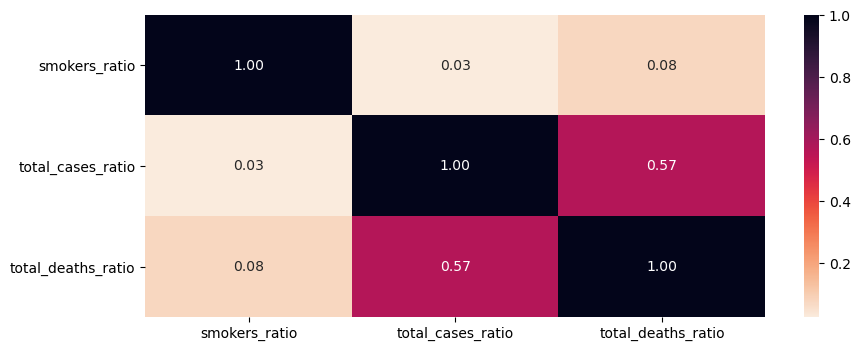

In [10]:
sb.heatmap(corona_cn_sm_r.corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');

<a id="id_4_3_2"></a>
### [Conclusions](#id_4_3_2)

In the COVID-19 pandemic, questions have been asked about clinical outcomes for smokers, and whether they are equally susceptible to infection, and if nicotine has any biological effect on the SAR-CoV-2 virus.
 
The results we have got so far which are the correlations between `smoking` habit and both infection rates and death rates are `weak positive` correlation which correspond with this article from [**WHO**](https://www.who.int/news-room/commentaries/detail/smoking-and-covid-19).

And I'm quoting from it: <br> **`What is the risk of smokers being infected by SARS-CoV-2?`** <br> `There are currently no peer-reviewed studies that have evaluated the risk of SARS-CoV-2 infection among smokers. This research question requires well-designed population-based studies that control for age and relevant underlying risk factors.` <br>
Also,<br>
`At the time of this review (30 June 2020), the available evidence suggests that smoking is associated with increased severity of disease and death in hospitalized COVID-19 patients. Although likely related to severity, there is no evidence to quantify the risk to smokers of hospitalization with COVID-19 or of infection by SARS-CoV-2 was found in the peer-reviewed literature. Population-based studies are needed to address these questions.`

Thus, we **can't answer** this question with agreeing or disagreeing and need a `further investigation` and `population-based studies` to address these questions.


[Back](#id_4_3)

<a id="id_4_4"></a>
## [Does Government Stringency Policies Reduced Infection Rates?](#id_4_4)
**Government Response Stringency Index:** composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response)

**Note:** According to tab from [**WHO**](https://www.who.int/health-topics/coronavirus#tab=tab_3), symptoms of the coronavirus disease can take on average `5–6` days from when someone is infected with the virus for symptoms to show, however it can take up to `14 days`. 

That's means, in order to **government stringency** effect to appears in controlling Covid-19, it can take up to 14 days. Thus, we need to shift `stringency_index` 14 days forward, so, if it controls Covid-19, we would be able to notice.

[Explore](#id_4_4_1) - [Conclusions](#id_4_4_2) - [Communicate](#id_4_4_3)

[Back to Explore and Analyze](#id_4)

<a id="id_4_4_1"></a>
### [Explore](#id_4_4_1)

In [11]:
# Get top 5 countries other than 'OWID_WRL'
country_top_cases = country_names_corona.loc[country_names_corona['total_cases'].nlargest(7).index][1:]
strin_ind = corona[['total_cases', 'country_code', 'date' ,'stringency_index']]

top_inf_strin = strin_ind[strin_ind['country_code'].isin(country_top_cases['country_code'].values)].reset_index(drop = True)
top_inf_strin['stringency_index'] = top_inf_strin['stringency_index'].shift(14)

# Adding country names
top_inf_strin = top_inf_strin.merge(country[['country_code', 
                                             'country_name']], 
                                    on = 'country_code')

# Removing year 2019
top_inf_strin = top_inf_strin[top_inf_strin['date'] > '2019-12-31']

# Adding months
top_inf_strin['month'] = top_inf_strin['date'].apply(lambda x: x.month)

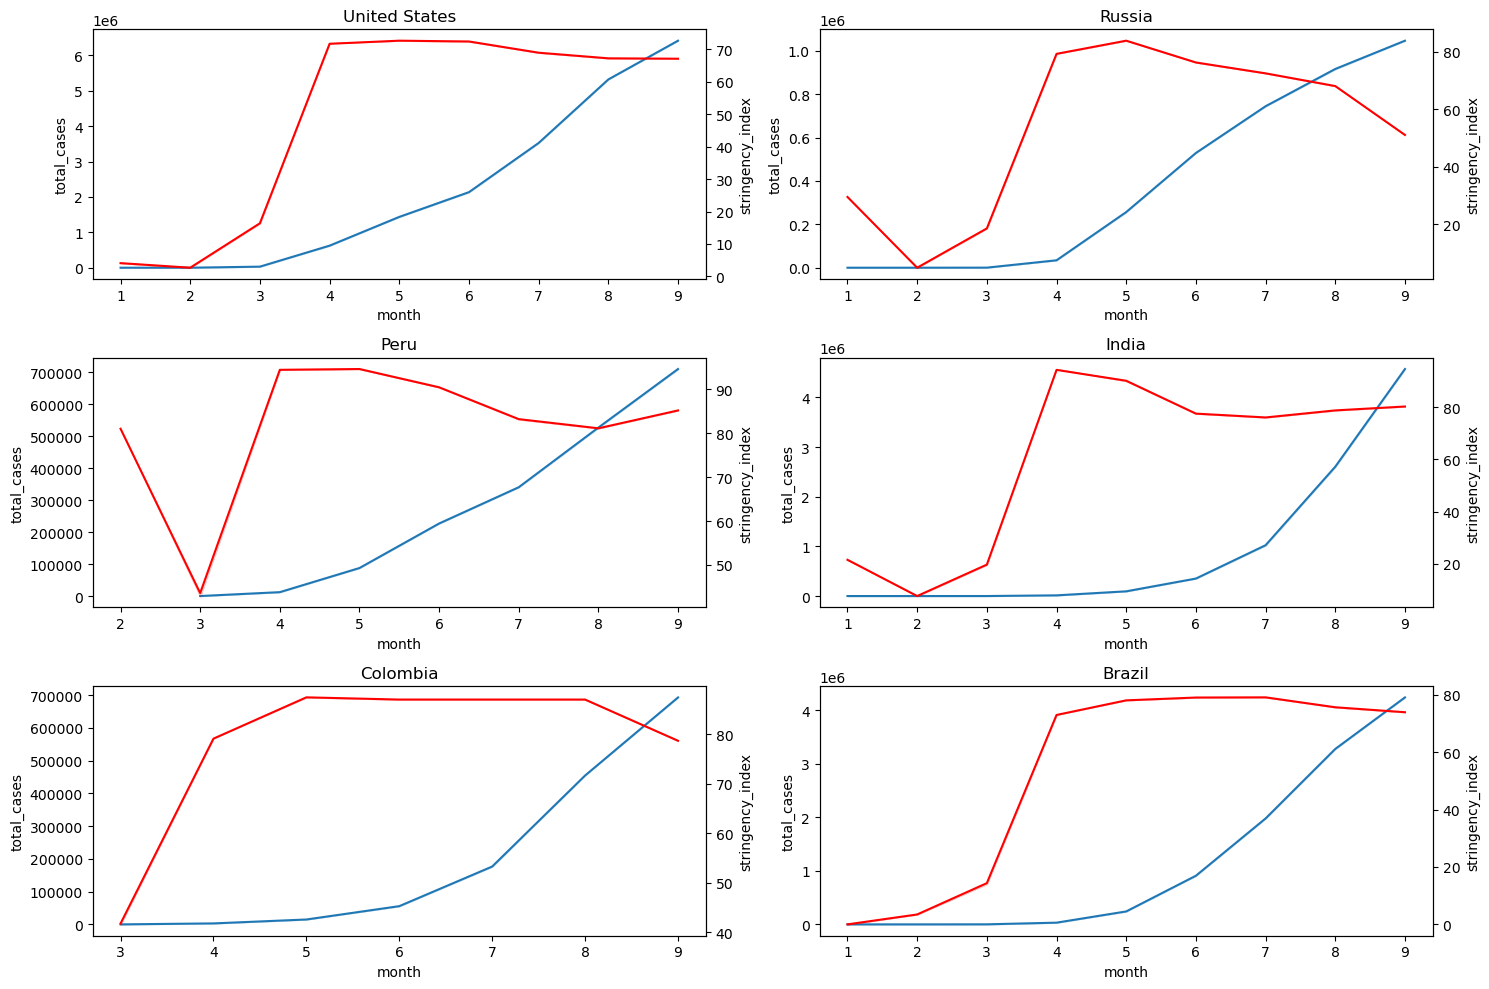

In [12]:
# Top country sorted in ascending order
unique_top_inf = pd.Series(top_inf_strin['country_name'].unique()).sort_values(ascending = False).reset_index(drop = True)

fig, axes = plt.subplots(3, 2, figsize=[15, 10])

axes_ = axes.flatten() # flatten axes array

# Create plots for each top 6 infected countries
# total_cases vs. stringency_index
for ax_n, country_name in zip(range(6), unique_top_inf):
    ax = axes_[ax_n]
    country_data = top_inf_strin[top_inf_strin['country_name'] == country_name]
    ax.set_title(country_name)
    sb.lineplot(ax = ax, data = country_data, x = "month", y = "total_cases", legend=False, ci=0)
    ax2 = ax.twinx()
    sb.lineplot(data = country_data, x = "month", y = "stringency_index", ax = ax2, legend = False, color = "r", ci=0)
    plt.tight_layout();

<a id="id_4_4_2"></a>
### [Conclusions](#id_4_4_2)
Generally, we can say that **government stringency** reached at its heights around `March` to `May`, but although these restricted policies, `governments have failed to control` **Corona Virus**, and on contrast, they started to `reduce` their stringency or keep it at the same level starting from `September`, under the `noticeable increase` in **Covid-19** cases.

[Back](#id_4_4)

<a id="id_4_5"></a>
## [What's the Monthly State for Corona Cases and Deaths?](#id_4_5)
[Explore](#id_4_5_1) - [Conclusions](#id_4_5_2)

[Back to Explore and Analyze](#id_4)

<a id="id_4_5_1"></a>
### [Explore](#id_4_5_1)

[Back](#id_4_5)

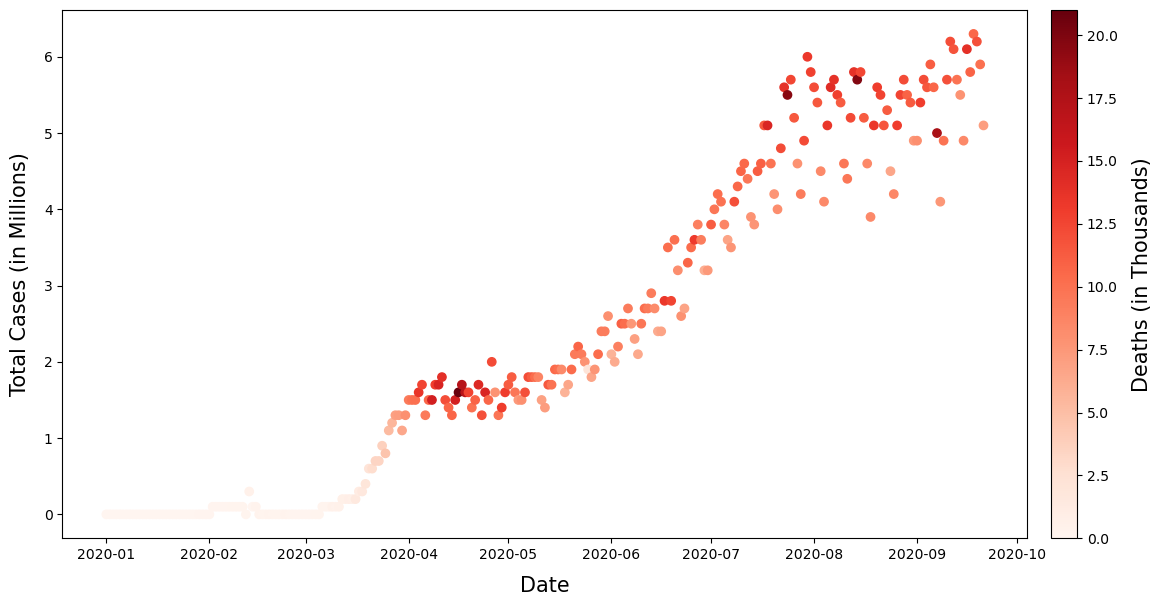

In [13]:
# Subsetting and preparing the data
daily_cases = corona[['country_code', 'date', 'new_cases', "new_deaths"]].groupby(['date']).sum().reset_index()
daily_cases = daily_cases[daily_cases['date'] > '2019-12-31'] # Exclude dates before 2020
daily_cases['new_cases_norm'] = round(daily_cases['new_cases'] / 1e5, 1) # Normalizing the numbers by 100,000
daily_cases['new_deaths_norm'] = round(daily_cases['new_deaths'] / 1e3, 1) # Normalizing the numbers by 1000

# Creating scatter plot
plt.figure(figsize=[15, 7])
plt.scatter(data = daily_cases,
            x = 'date',
            y = 'new_cases_norm',
            c = 'new_deaths_norm',
            cmap = 'Reds')

# add colorbar
plt.colorbar(pad = 0.02).set_label('Deaths (in Thousands)', labelpad=10, fontsize=15)

plt.xlabel('Date', labelpad=10, fontsize=15)
plt.ylabel('Total Cases (in Millions)', labelpad=10, fontsize=15);

<a id="id_4_5_2"></a>
### [Conclusions](#id_4_5_2)
Clearly, we can see that we are heading to a second peak after **April-May** period where **Corona deaths** were increased in the period between **April-May** and the deaths are increasing again since **August** till now.

[Back](#id_4_5)

<a id="id_4_6"></a>
## [What's The World Situation Now?](#id_4_6)
Let's use map to plot the **world situation** for Coronavirus infection rates.

[Explore](#id_4_6_1) - [Conclusions](#id_4_6_2)

[Back to Explore and Analyze](#id_4)

<a id="id_4_6_1"></a>
### [Explore](#id_4_6_1)

[Back](#id_4_6)

In [14]:
# Total cases each country
country_tot_cases = corona.merge(country, on = 'country_code').groupby('country_name')['new_cases'].sum()

# set the filepath and load
fp = 'data/shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp'

#reading the file stored in variable fp
world = gpd.read_file(fp)

world = world[world.CNTRY_NAME!="Antarctica"]

# Adding corona stats to world map
world_cases = world.merge(country_tot_cases, 
                          left_on = 'CNTRY_NAME', 
                          right_on = 'country_name').rename(columns={'new_cases': 'total_cases'})

# Preparing data
country_pop = country.merge(pop, on = 'country_code')[['country_name', 'population']]

# Adding population stats to world map
world_cases_pop = world_cases.merge(country_pop, 
                                    left_on = 'CNTRY_NAME', 
                                    right_on = 'country_name').drop(columns='country_name')

# Adding infection ratio to world map
world_cases_pop['infection_ratio'] = (world_cases_pop['total_cases'] / world_cases_pop['population']) * 100

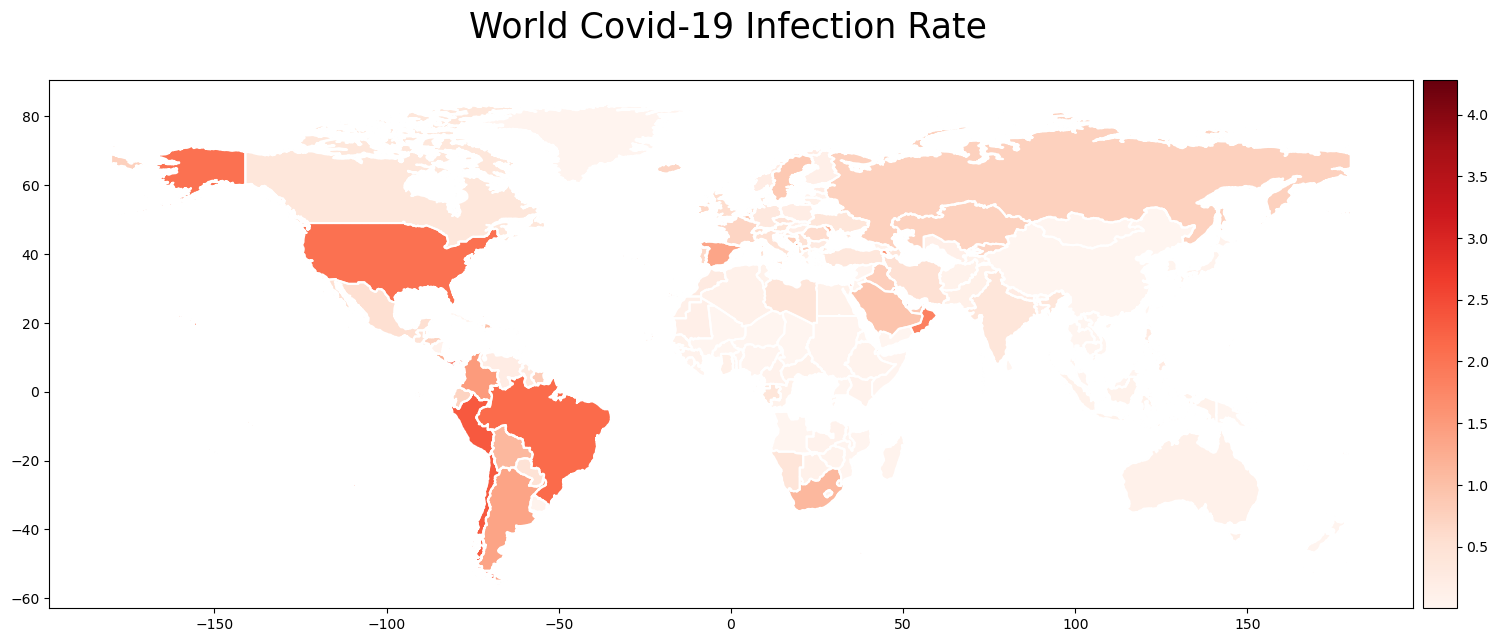

In [15]:
fig, ax = plt.subplots(1, 1, figsize=[20, 7])

fig.suptitle('World Covid-19 Infection Rate', fontsize=25) # Set title

# Create customize color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.1)

# Creating boundries
world_cases_pop.boundary.plot(ax=ax, color='w', figsize=0.1)

# Creating world map
world_cases_pop.plot(ax=ax, column='infection_ratio', legend=True, cax=cax, cmap='Reds');

<a id="id_4_6_2"></a>
### [Conclusions](#id_4_6_2)
As we found from the previous results, `USA`, `Russia`, `Peru` and `Brazil` are on the **top infected** countries with **Coronavirus**, also `South America` is the **most infected** continent.

[Back](#id_4_6)

<a id="id_3_3_4"></a>
> ### [So Far, So Good](#id_3_3_4)
After done analyzing and exploring, we are ready to communicate our results.
>- [X] Gathering
>- [X] Assessing
>- [X] Cleaning
>- [x] Storing
>- [x] Analyzing
>- [ ] Visualizing
>- [ ] Reporting
>
> [Back to Analyzing and Visualizing](#id_4)

<a id="id_5"></a>
<h1 style="font-size:30px; color:#3A71AE">Communication and Visualizing</h1>

After the [**Exploring and Analyzing**](#id_7) step, we are ready to communicate the insights we have found, through polishing the visuals we have created in that step to create an **Explanatory** data visualization.

**The questions we had:**
1. [**What's The Infection Ratio For Each Continent?**](#id_5_1)
2. [**What are The Top 10 Infected Countries?**](#id_5_2)
3. [**Does Smoking Habit Affect Corona Infection and Death Rates?**](#id_5_3)
4. [**Does Government Stringency Policies Reduced Infection Rates?**](#id_5_4)
5. [**What's the Monthly State for Corona Cases and Deaths?**](#id_5_5)
6. [**What's The World Situation for Now?**](#id_5_6)
    
[Back to Top](#top)

<a id="id_5_1"></a>
### [**What's The Infection Ratio For Each Continent?**](#id_5_1)
**South America** has the highest `infection rate` with `1.75%` followed by **North America** with `1.39%` and **Europe** with `0.59%` etc.

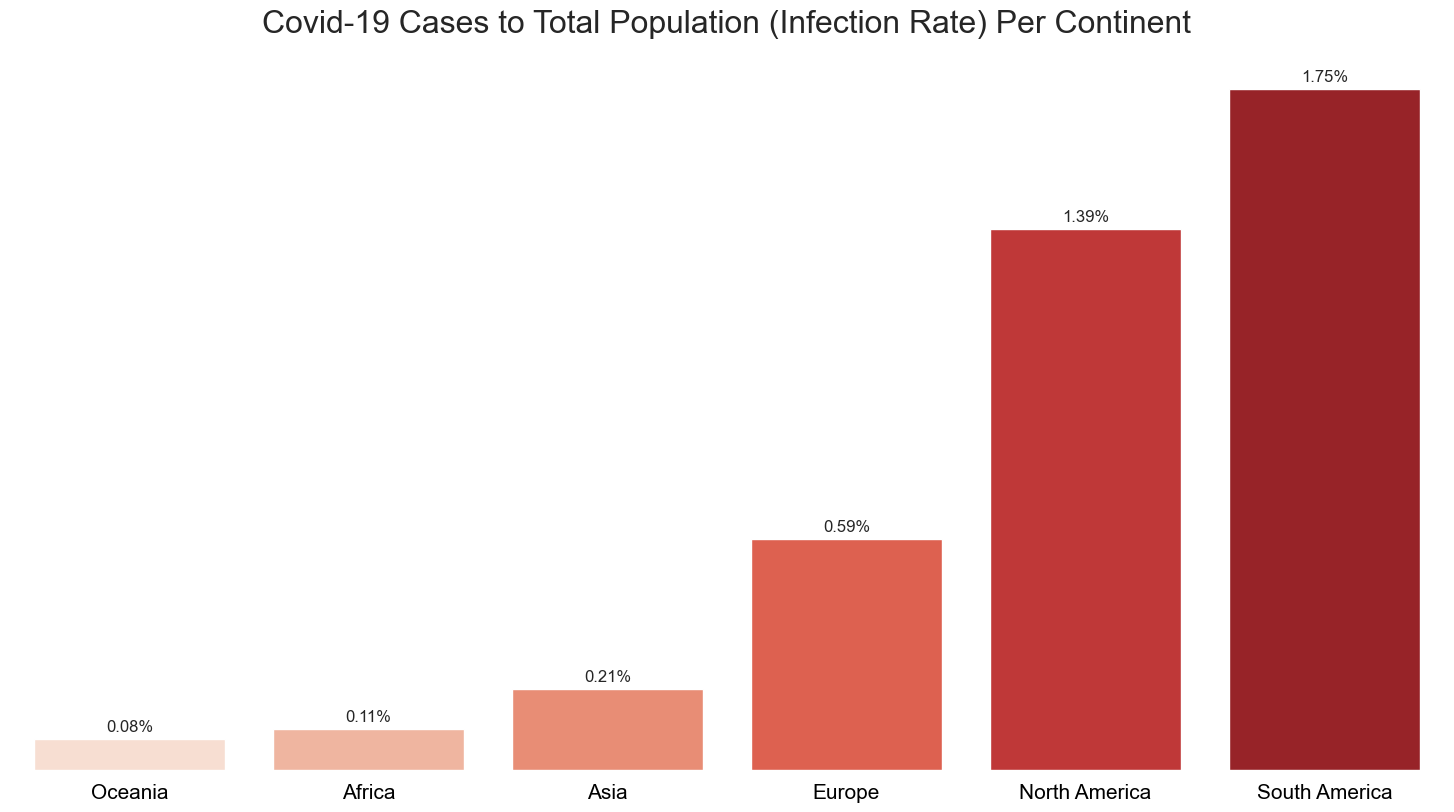

In [16]:
pop_cases_ratio = pop_cases_ratio.sort_values() # Sort values in ascending order

x = pop_cases_ratio.index # Get x labels and order

sb.set(style='white') # Set seaborn style

fig, ax = plt.subplots(figsize=[14.70, 8.27]) # Create figure and axes with default figure size

muted_color = sb.color_palette('dark')[3]

sb_barplot = sb.barplot(ax = ax, x = x, y = pop_cases_ratio, order = x, palette = 'Reds') # Crea bar plot
sb.despine(left=True, bottom=True) # Remove plot borders

for p in sb_barplot.patches: # Add annotation for each patch
    sb_barplot.annotate(text       = format(p.get_height(), '.2f')+'%',
                        xy         = (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha         = 'center', va = 'center',
                        xytext     = (0, 9),
                        textcoords = 'offset points')

plt.xticks(fontsize=15, color = 'black') # Increase x ticks labels font size
plt.yticks([]) # Remove y ticks

plt.xlabel('') # Remove x label

plt.title('Covid-19 Cases to Total Population (Infection Rate) Per Continent', y = 1.02, fontsize = 23); # Add descriptive title

plt.tight_layout() # Improve appearance

plt.savefig('src/continent_inf.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file

<a id="id_5_2"></a>
## [What are The Top 10 Infected Countries?](#id_5_2)
**Peru**, **Brazil**, and **Argentina** are the `top 3` infected countries (they are all from **South America**, the `most infected continent`).

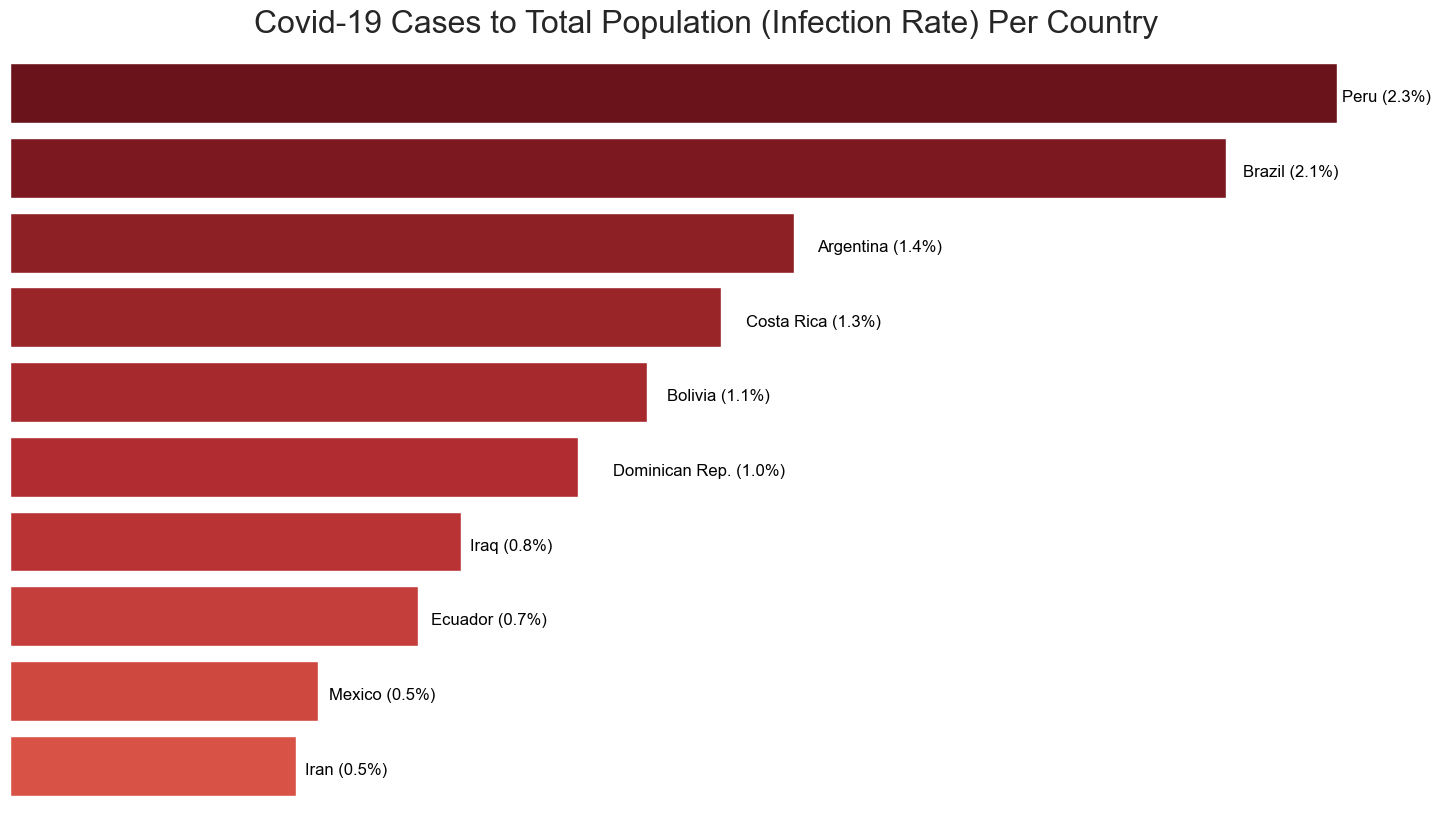

In [17]:
# Shorten 'Dominican Republic' name
top_infected_countries = top_infected_countries.replace('Dominican Republic', 'Dominican Rep.')
# Get country names
country_names = top_infected_countries['country_name']

fig, ax = plt.subplots(figsize=[14.70, 8.27]) # Create figure and axes with default figure size

# I'm chossing the 'top 10 darker' reds from color_palette("Reds_r", 25) to visual the 'top infected' country
dark_reds = sb.color_palette("Reds_r", 25)[:-15]

sb_barplot = sb.barplot(data  = top_infected_countries, 
                        y     = 'country_name', 
                        x     = 'infected_ratio',
                        palette = dark_reds) # Crea bar plot

sb.despine(left=True, bottom=True) # Remove plot borders

for name, p in zip(country_names, sb_barplot.patches): # Add annotation for each patch
    len_name = len(name)/80
    sb_barplot.annotate(text       = name+' ('+format(p.get_width(), '.1f')+'%'+')', 
                        xy         = (p.get_width()+len_name-0.06, p.get_y() + p.get_height() / 1.75), 
                        ha         = 'center',
                        va         = 'center', 
                        xytext     = (40, 0), 
                        textcoords = 'offset points',
                        color = 'black')
    
plt.xticks([]) # Remove x ticks
plt.yticks([]) # Remove y ticks

plt.xlabel('') # Remove x label
plt.ylabel('') # Remove y label

plt.title('Covid-19 Cases to Total Population (Infection Rate) Per Country', y = 1.02, fontsize = 23) # Add descriptive title

plt.tight_layout()# Improve appearance

plt.savefig('src/top_country_inf.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file

<a id="id_5_3"></a>
## [Does Smoking Habit Affect Corona Infection and Death Rates?](#id_5_3)
The question of **Covid-19** being `more dangerous` on `smokers` than `non-smokers` has not been confirmed yet, so, `population-based studies` are needed to address this question.

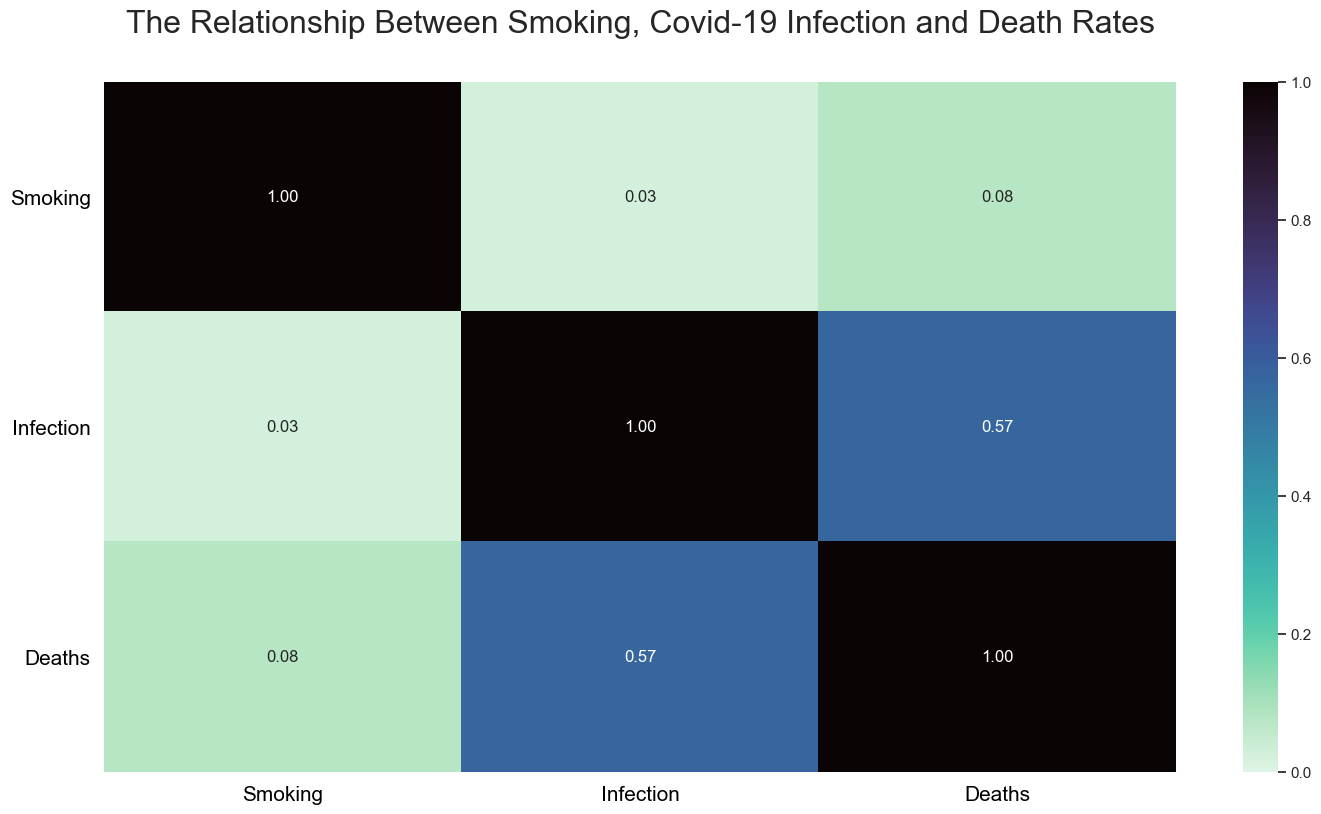

In [18]:
# Setting ticks labels
ticks_labels = ['Smoking', 'Infection', 'Deaths']

plt.figure(figsize=[14.70, 8.27]) # Create figure with default figure size

# Creating heatmap plot
sb.heatmap(corona_cn_sm_r.corr(),
           cmap = 'mako_r',
           annot = True,
           fmt = '.2f',
           cbar = True,
           xticklabels = ticks_labels,
           yticklabels = ticks_labels,
           vmin=0)

# Adding title
plt.title('The Relationship Between Smoking, Covid-19 Infection and Death Rates', fontsize=23, y = 1.06)

# Adding x and y ticks
plt.xticks(fontsize = 15, color = 'black')
plt.yticks(fontsize = 15, color = 'black', rotation = 0)

plt.tight_layout() # Improve appearance

plt.savefig('src/smokin_covid19_corr.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file

<a id="id_5_4"></a>
## [Does Government Stringency Policies Reduced Infection Rates?](#id_5_4)

Generally, we can say that **government stringency** policies have failed to to control **Covid-19** pandemic. Thus, we need to find better and more effective solutions.

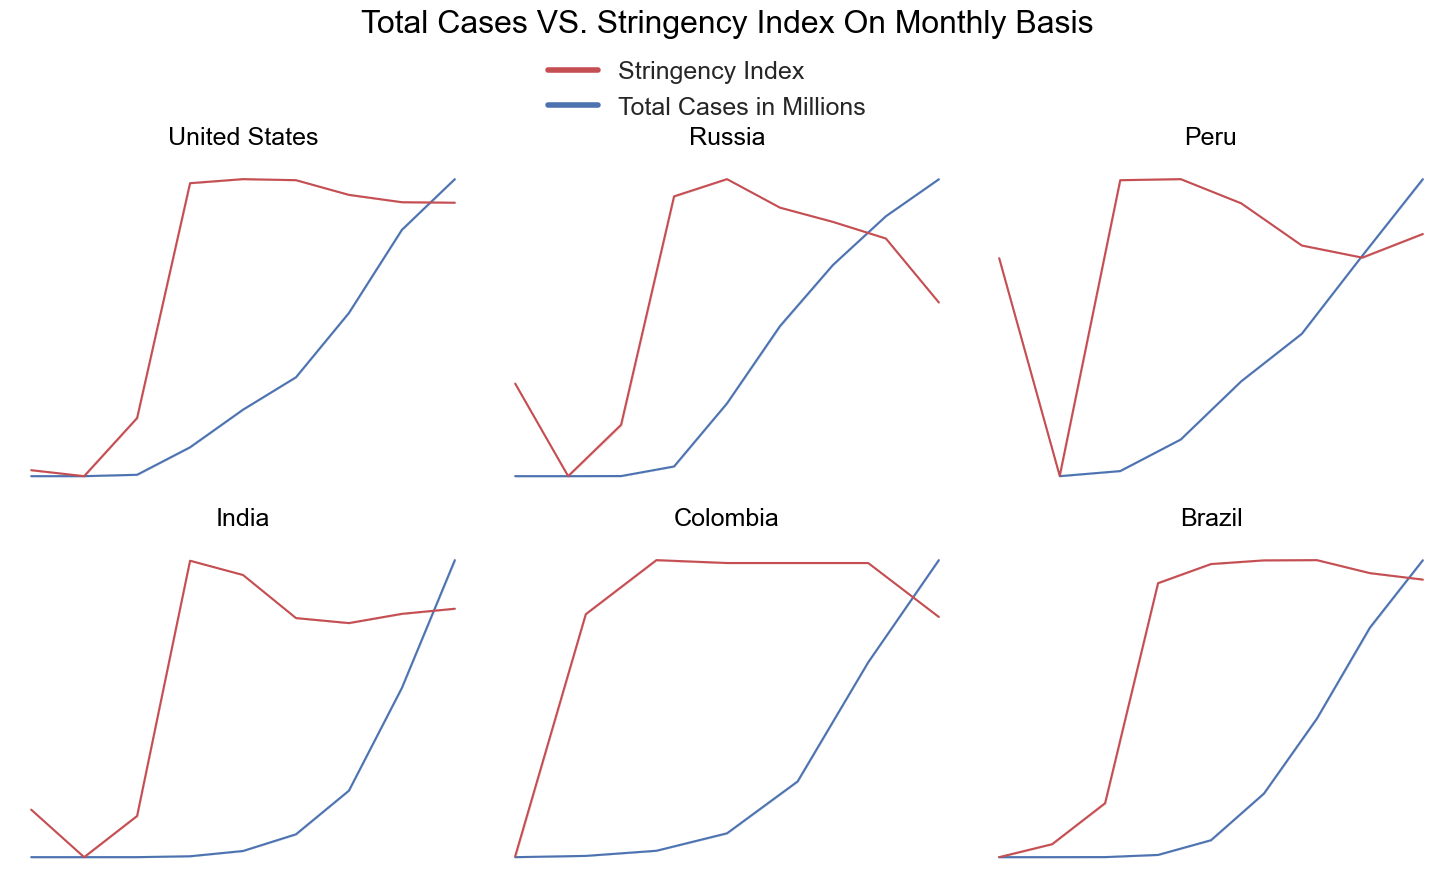

In [19]:
# Create figure with 3*2 subplots
fig, axes_sub = plt.subplots(2, 3, figsize=[14.70, 8.27]) # Create figure and axes with default figure size

# Create custome lines
custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='b', lw=4)]

# Add custome legend
fig.legend(handles = custom_lines,
           fontsize = 18,
           labels = ['Stringency Index', 'Total Cases in Millions'],
           frameon = False,
           bbox_to_anchor = [0.61, 1.03])


# Flatten axes array
axes = axes_sub.flatten()

# Add common title
fig.suptitle('Total Cases VS. Stringency Index On Monthly Basis', fontsize=23, y = 1.065, color = 'black')

# Create plots for each top 6 infected countries
# total_cases vs. stringency_index
for ax_n, country_name in zip(range(6), unique_top_inf):
    ax = axes[ax_n] # Current axis
    
    country_data = top_inf_strin[top_inf_strin['country_name'] == country_name] # Subsetting the data to the current country
    
    # Add first axis as 'total_cases'
    sb.lineplot(ax = ax, data = country_data, x = "month", y = "total_cases", legend=False, ci=0) 
    
    ax2 = ax.twinx() # Creating second axis as twin of the first axis
    
    # Add second axis as 'stringency_index'
    sb.lineplot(data = country_data, x = "month", y = "stringency_index", ax = ax2, legend = False, color = "r", ci=0)
    
    # Add title for the current plot
    ax.set_title(country_name, fontsize = 18, color = 'black', y = 1.035)
    
    # Remove ticks from axes
    ax.set_xticks([]), ax.set_yticks([]), ax2.set_yticks([])
    
    # Remove labels from axes
    ax.set_xlabel(''), ax.set_ylabel(''), ax2.set_ylabel('')
    
    ax.set_facecolor('xkcd:white') # Setting face color to white
    
    sb.despine(left=True, bottom=True) # Remove plot borders

plt.tight_layout() # Improve appearance

plt.savefig('src/cases_vs_string.png', transparent=True, bbox_inches='tight', pad_inches=1); # Save as png file

<a id="id_5_5"></a>
## [What's the Monthly State for Corona Cases and Deaths?](#id_5_5)
The recent increase in infection rates does not bode well, so, a lot of healthcare organizations had predicted a second wave of **Covid-19**, thus, we must all prepare for it!!

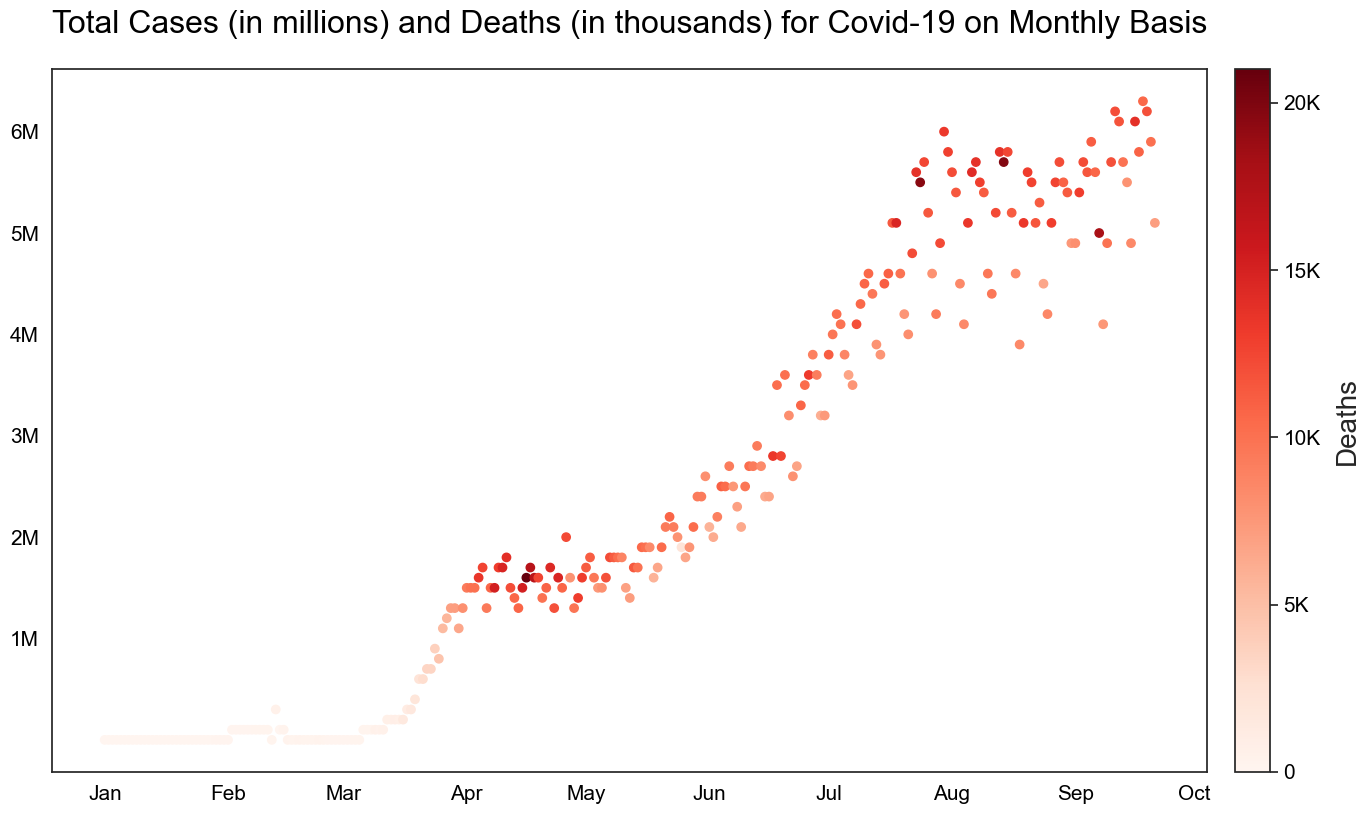

In [20]:
plt.figure(figsize=[14.70, 8.27]) # Create figure with default figure size

# Add customized scatter plot
plt.scatter(data = daily_cases,
            x = 'date',
            y = 'new_cases_norm',
            c = 'new_deaths_norm',
            cmap = 'Reds')

plt.title('Total Cases (in millions) and Deaths (in thousands) for Covid-19 on Monthly Basis', 
          color = 'black',
          fontsize=23,
          y = 1.04)

# Customize x ticks and labels
xticks, xticklabdels = plt.xticks()[0], np.append(daily_cases['date'].dt.month_name().str[:3].unique(), 'Oct')
plt.xticks(ticks = xticks, labels = xticklabdels, color = 'black', fontsize = 15)

# Customize y ticks and labels
yticks, yticklabdels = [0, 1, 2, 3, 4, 5, 6], ['', '1M', '2M', '3M', '4M', '5M', '6M']
plt.yticks(ticks = yticks, labels = yticklabdels, color = 'black', fontsize = 15)

# Customize color bar ticks and labels
cbar = plt.colorbar(pad=.02)
cbar.set_label('Deaths', fontsize = 20, labelpad = 10)
cbarticks, cbarlabels = [ 0,  5, 10, 15, 20], [ '0',  '5K', '10K', '15K', '20K']
cbar.set_ticks(cbarticks), cbar.set_ticklabels(cbarlabels)
cbar.ax.tick_params(labelsize=15, labelcolor='black')

plt.tight_layout() # Improve appearance

plt.savefig('src/covid19_cases_death_monthly.png', bbox_inches='tight', pad_inches=1); # Save as png file

<a id="id_5_6"></a>
## [What's The World Situation for Now?](#id_5_6)
`USA`, `Russia`, `Peru` and `Brazil` are the **top infected** countries with **Covid-19**, also `South America` is the **most infected** continent.

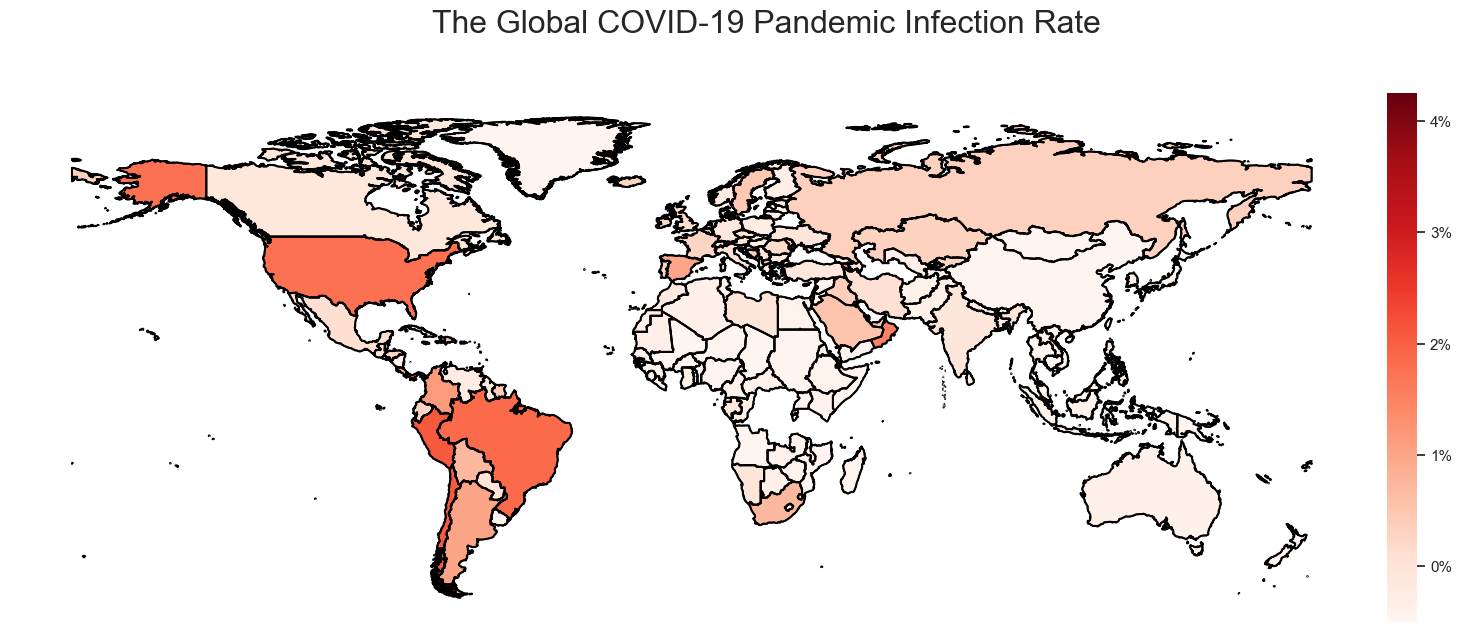

In [21]:
# Set seabor style

fig, ax = plt.subplots(1, 1, figsize=[20, 7])

# Add boundries
world_cases_pop.boundary.plot(ax=ax, color='black', figsize=0.2)

# Creat world map
world_cases_pop.plot(column='infection_ratio', ax=ax, legend=False, edgecolor='black', cmap='Reds')

fig.suptitle('The Global COVID-19 Pandemic Infection Rate', fontsize=23, y = 1, x = 0.55) # Add ttile

sb.despine(ax=ax, left=True, bottom=True) # Remove plot borders

ax.set_xticks(ticks=[]) # Remove x ticks
ax.set_yticks(ticks=[]) # Remove y ticks

# Create custome colorbar
vmin, vmax = -0.5, 4.25
fig = ax.get_figure()
cax = fig.add_axes([0.86, 0.1248, 0.015, 0.7555])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = [0, 1, 2, 3, 4]
cbar = fig.colorbar(sm, cax=cax)

# Customize colorbar ticks and labels
cbar.set_ticks([0, 1, 2, 3, 4])
cbar.set_ticklabels(['0%', '1%', '2%', '3%', '4%'])

cbar.outline.set_visible(False) # Remove colorbar border color

plt.savefig('src/global_covid19.png', bbox_inches='tight', transparent=True, pad_inches=1); # Save as png file

<a id="id_6"></a>
<h1 style="font-size:30px; color:#3A71AE">Reporting</h1>

Finally, we can now report our **findings** and **insights** that we have found.

[Back to Top](#top)

<a id="id_6_1"></a>
> ### [Congratulation](#id_6_1)
And congratulation, we have done all the following:
>- [X] Gathering
>- [X] Assessing
>- [X] Cleaning
>- [X] Storing
>- [X] Analyzing
>- [X] Visualizing
>- [X] Reporting

[Back to Reporting](#id_6)

<img src="src/cong.gif" width="800" height="600">